# Managing Data

Here we will give examples of managing GIS data.

In [5]:
import matplotlib.pyplot as plt
from hera import GIS
from hera import datalayer

GISdatalayer = GIS.GIS_datalayer(projectName = "Examples", FilesDirectory = "/home/ofir/tmp/BNTL-HAIFA")

The GIS_datahandler class helps managing GIS data. 
The class requires a project name and a directory path in which to save new files.

## Defining the origin shapefile

In order to use the GIS module, a shapefile that holds GIS data must be set as the origin shapefile of the projects.
It is highly recommended to use a shapefile that describes large areas as the origin shapefile. 
Smaller areas may be cut later from the origin file.
For example, in this tutorial we use a shapefile that describes all Israel as the origin,
and cut a smaller one that describes Haifa only as the area that intersets us.

Defining the origin shapefile is done once at the begining of a project, by adding a document to the database.
The document should be added this way:

In [6]:
projectName = "Examples"
modes = {"Contour": "RELIEF/CONTOUR.shp", "Buildings": "BUILDINGS/BLDG.shp", "Roads": "TRANSPORTATION/MAIN_ROAD.shp"}
resource="/mnt/public/New-MAPI-data/BNTL_MALE_ARZI/BNTL_MALE_ARZI"
datalayer.Measurements.addDocument(projectName=projectName, desc={"modes":modes}, type="GISOrigin", resource=resource)

<Measurements: Measurements object>

The resource is a path to a directory that holds several shapefiles.
The modes dictionary connects shapefiles within the directory to names that would use to relate to them.
Note that the default mode that the GISdatalayer looks for is "Contour". However, 
it isn't a requirement to add this mode.

## Getting and adding Data

Getting data is done using a function called getGISdata.
This function may load existing data, or add new data if the requested data isn't available.

In order to create a new file and a corresponding document in the database,
two parameters must be given to the function.
The first is called points, and it holds the ITM coordinates of a rectangle.
It is a list, from the structure [minimum x, minimum y, maximum x, maximum y].
The second is called CutName, and it is used as part of the new file's name.

The file is created using the defined GISOrigin.
Therefore, the reactangle must be located within the boundaries of the origin shapefile.

Any other parameters can be given as descriptors of the data.
In the next example a parameter named Region is defined.

In [7]:
points = [193000, 731000, 218500, 763000]
example_data = GISdatalayer.getGISDocuments(points=points, CutName="Example", Region="Haifa")
example_data

[<Measurements: Measurements object>]

The function retruns a list of documents. Throughout the rest of the tutorial, we would use the data achieved by getData().

In [8]:
example_data = example_data[0].getData()
example_data[:10]

,FCODE,FTYPE,HEIGHT,ORIG_LEN,SHAPE_Leng,geometry
0,611,10,0,19938.695735,19938.695735,"LINESTRING (207394.358 763000.000, 207392.793 ..."
1,611,10,0,42.973966,42.973966,"LINESTRING (207161.130 760600.113, 207160.685 ..."
2,611,10,0,86.598621,86.598621,"LINESTRING (207363.937 760392.098, 207366.788 ..."
3,611,11,5,33452.888982,33452.888982,"LINESTRING (195706.140 740000.000, 195699.475 ..."
4,611,11,5,380.349931,380.349931,"LINESTRING (207060.154 740000.000, 207064.209 ..."
5,611,11,5,129.627380,129.627380,"LINESTRING (207004.017 739924.000, 207002.902 ..."
6,611,11,5,12.104079,12.104079,"LINESTRING (208512.131 740000.000, 208508.487 ..."
7,611,11,5,100.395797,100.395797,"LINESTRING (206933.499 739797.454, 206932.739 ..."
8,611,11,5,54.094820,54.094820,"LINESTRING (207074.941 739808.000, 207073.838 ..."
9,611,11,5,63.664270,63.664270,"LINESTRING (207287.833 739771.791, 207287.640 ..."


The data is loaded as a geopandas dataframe.

Now that the new project contains data, the data can be loaded by addressing its descriptors.
Using the getGISdata without any parameters will return all the documents in the project.
In the next example, we will load all the data that holds the region Haifa.

In [9]:
example_data = GISdatalayer.getGISDocuments(Region="Haifa")[0].getData()
example_data[:10]

,FCODE,FTYPE,HEIGHT,ORIG_LEN,SHAPE_Leng,geometry
0,611,10,0,19938.695735,19938.695735,"LINESTRING (207394.358 763000.000, 207392.793 ..."
1,611,10,0,42.973966,42.973966,"LINESTRING (207161.130 760600.113, 207160.685 ..."
2,611,10,0,86.598621,86.598621,"LINESTRING (207363.937 760392.098, 207366.788 ..."
3,611,11,5,33452.888982,33452.888982,"LINESTRING (195706.140 740000.000, 195699.475 ..."
4,611,11,5,380.349931,380.349931,"LINESTRING (207060.154 740000.000, 207064.209 ..."
5,611,11,5,129.627380,129.627380,"LINESTRING (207004.017 739924.000, 207002.902 ..."
6,611,11,5,12.104079,12.104079,"LINESTRING (208512.131 740000.000, 208508.487 ..."
7,611,11,5,100.395797,100.395797,"LINESTRING (206933.499 739797.454, 206932.739 ..."
8,611,11,5,54.094820,54.094820,"LINESTRING (207074.941 739808.000, 207073.838 ..."
9,611,11,5,63.664270,63.664270,"LINESTRING (207287.833 739771.791, 207287.640 ..."


If we would write a region that doesn't appear in the database we will get an error,
and the program would ask for points and a CutName for the new data.

In [10]:
example_data = GISdatalayer.getGISDocuments(Region="haifa")

KeyError: 'Could not find data. Please insert points and CutName for making new data.'

## GIS Data Types

The data we have loaded so far contains contour lines.
The data can be easily plotted, as demonstrated below.

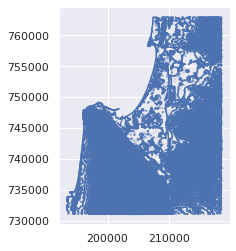

In [11]:
example_data.plot()
plt.show()

The contour lines data is the default data mode.
However, any modes that are descripted at the modes dictionary of the origin document may be used.
In our example, this modes are buildings and roads.
This two data types are presented below.

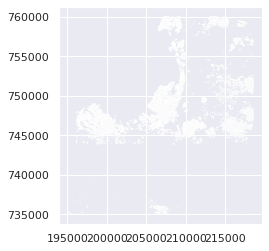

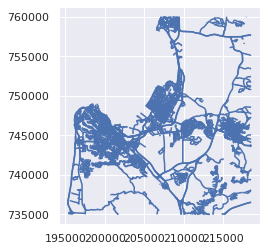

In [13]:
points = [193000, 735000, 218500, 760000]
example_buildings = GISdatalayer.getGISDocuments(points=points, CutName="Example", Region="Haifa", mode="Buildings")[0].getData()
example_roads = GISdatalayer.getGISDocuments(points=points, CutName="Example", Region="Haifa", mode="Roads")[0].getData()
example_buildings.plot()
example_roads.plot()
plt.show()

The data type is saved as one of the descriptors, called 'mode', and can be used for querying data.
In the next example we would load all the contour data in the project.

In [14]:
example_contour = GISdatalayer.getGISDocuments(mode="Contour")[0].getData()
example_contour[:10]

,FCODE,FTYPE,HEIGHT,ORIG_LEN,SHAPE_Leng,geometry
0,611,10,0,19938.695735,19938.695735,"LINESTRING (207394.358 763000.000, 207392.793 ..."
1,611,10,0,42.973966,42.973966,"LINESTRING (207161.130 760600.113, 207160.685 ..."
2,611,10,0,86.598621,86.598621,"LINESTRING (207363.937 760392.098, 207366.788 ..."
3,611,11,5,33452.888982,33452.888982,"LINESTRING (195706.140 740000.000, 195699.475 ..."
4,611,11,5,380.349931,380.349931,"LINESTRING (207060.154 740000.000, 207064.209 ..."
5,611,11,5,129.627380,129.627380,"LINESTRING (207004.017 739924.000, 207002.902 ..."
6,611,11,5,12.104079,12.104079,"LINESTRING (208512.131 740000.000, 208508.487 ..."
7,611,11,5,100.395797,100.395797,"LINESTRING (206933.499 739797.454, 206932.739 ..."
8,611,11,5,54.094820,54.094820,"LINESTRING (207074.941 739808.000, 207073.838 ..."
9,611,11,5,63.664270,63.664270,"LINESTRING (207287.833 739771.791, 207287.640 ..."


## Managing Geometry Shapes Database

Other kinds of data that are usefull to save in the database are points and polygons.
It is usefull to save the coordinates of known locations such as cities or points of interest.

In order to add a new location to the database, use the addGeometry function.
The function must receive an unused name for the new location, and the location itself.

A point can be induced either as a shapely.geometry.Point or a list.

In [15]:
from shapely import geometry

Haifa_Port = geometry.Point([200000,748000])
# Haifa_Port = [200000,748000] this syntax would work as well.

GISdatalayer.addGeometry(name="Haifa_Port", Geometry=Haifa_Port)

A polygon can be induced either as a shapely.geometry.Polygon, a list of points or a list of x coordinated and y coordinates.

In [16]:
Bahai_Gardens = geometry.Polygon([[199220,747015],[199333,746947],[198957,746277],[198779,746438]])
# Bahai_Gardens = [[199220,747015],[199333,746947],[198957,746277],[198779,746438]] this syntax would work as well.
# Bahai_Gardens = [[199220,199333,198957,198779],[747015,746947,746277,746438]] this syntax would work as well.

GISdatalayer.addGeometry(name="Bahai_Gardens", Geometry=Bahai_Gardens)

The locations can be loaded using another function by addressing their names.

In [17]:
type(GISdatalayer.getGeometry(name="Haifa_Port"))

shapely.geometry.point.Point

The location's coordinates and type of shapely geometry may also be loaded.

In [18]:
points, geometry_type = GISdatalayer.getGeometryPoints("Bahai_Gardens")
print("points: %s, geometry type: %s" % (points, geometry_type))

points: [[199220.0, 747015.0], [199333.0, 746947.0], [198957.0, 746277.0], [198779.0, 746438.0], [199220.0, 747015.0]], geometry type: Polygon


## Loading images

Images can be loaded to the database using the next method:

In [19]:
path = "/home/ofir/Projects/2020/GIS/Haifa.png" # The image's path
location = "Haifa" # The image's location
extents = [193000, 218500,731000,763000] # coordinates [left, right, bottom, up]

GISdatalayer.loadImage(path=path, locationName=location, extents=extents)

## Geometrical Queries

The data can also be querried by geometrical properties.
The default type of querries check if a certain geometry lies entirely within existing datas.
For example, we would define a line that lies entirely within the rectangle of the contour data but some of it is outside the bounds of the other data types.
The query would return only the contour data.

The query is done by addressing a parameter called 'geometry'.

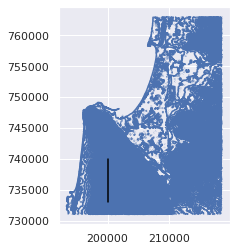

In [20]:
line = geometry.LineString([(200000, 740000), (200000, 733000)])
example_contain = GISdatalayer.getGISDocuments(Geometry=line)[0].getData()
example_contain.plot()
plt.plot([200000,200000],[733000,740000], color="black")
plt.show()

Another kind of geometrical queries return all the data that intersects with the defined geometry.
It is defined by a parameter called 'GeometryMode'.
The line intersects with all the data types we had saved in the database.
Therefore, all the data should be returned.

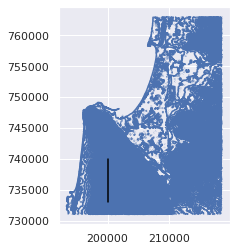

In [27]:
example_intersect = GISdatalayer.getGISDocuments(Geometry=line, GeometryMode="intersects")[0]
for example in example_intersect:
    example = example.getData()
    example.plot()
    plt.plot([200000,200000],[733000,740000], color="black")
    plt.show()

In addition, a saved shapely geometry name can be given as the geometry.
For example, in the next example all the data that contains Haifa's port is loaded.

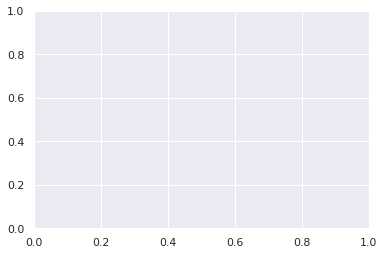

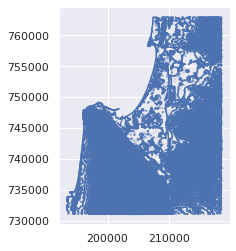

In [30]:
contain_port = GISdatalayer.getGISDocuments(Geometry="Haifa_Port")[0]
for example in contain_port:
    example = example.getData()
    fig, ax = plt.subplots(1,1)
    ax = example.plot()